In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df=pd.read_csv('insurance2.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [56]:
df.shape

(1338, 8)

In [57]:
df.isna().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


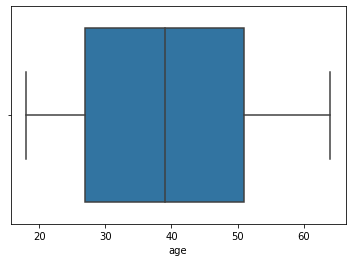

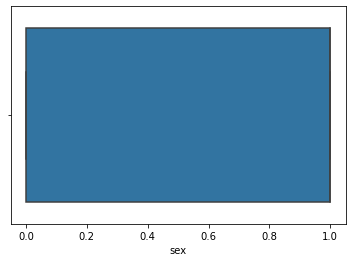

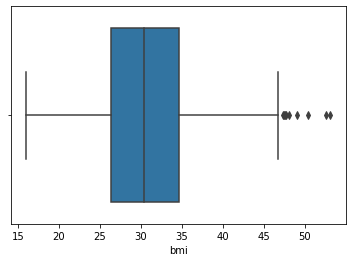

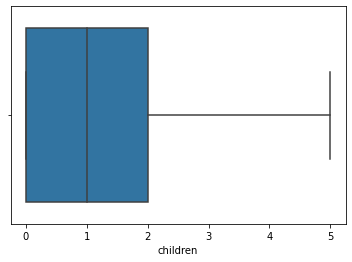

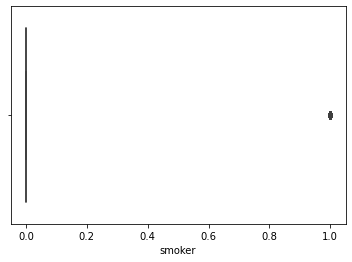

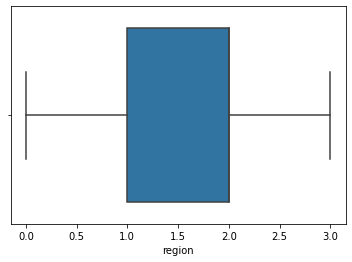

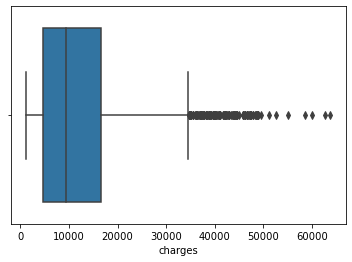

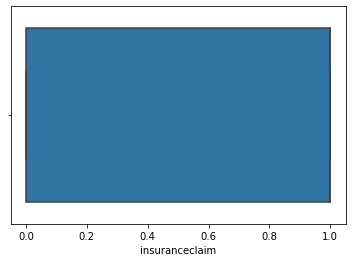

In [59]:
for i in df.columns:
    sns.boxplot(x=i,data=df)
    plt.show()

In [60]:
def T_Outliers(data):
    for i in data.drop(['insuranceclaim'],axis=1).columns:
        Q1=np.percentile(data[i],25)
        Q3=np.percentile(data[i],75)
        IQR=Q3-Q1
        lower=Q1-(IQR*1.5)
        upper=Q3+(IQR*1.5)
        data.loc[:,i]=np.where(data[i].values>upper,upper,data[i].values)
        data.loc[:,i]=np.where(data[i].values<lower,lower,data[i].values)
    return data

In [61]:
df2=T_Outliers(df)

In [62]:
df2.corr()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.111930,0.042469,NaN,0.002127,0.313394,0.113723
sex,-0.020856,1.000000,0.044802,0.017163,NaN,0.004588,0.052322,0.031565
bmi,0.111930,0.044802,1.000000,0.013700,NaN,0.157811,0.160996,0.384957
children,0.042469,0.017163,0.013700,1.000000,NaN,0.016569,0.073074,-0.409526
smoker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,0.002127,0.004588,0.157811,0.016569,NaN,1.000000,-0.016890,0.020891
charges,0.313394,0.052322,0.160996,0.073074,NaN,-0.016890,1.000000,0.304062
insuranceclaim,0.113723,0.031565,0.384957,-0.409526,NaN,0.020891,0.304062,1.000000


In [63]:
X=df2.drop(['insuranceclaim'],axis=1)
Y=df2.insuranceclaim

In [64]:
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
X_mc=mc.fit_transform(X)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_mc,Y,test_size=0.30,random_state=2021)

In [73]:
# from sklearn.svm import SVC
# svc=SVC()


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state = 2021)

rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=2021)

In [74]:
from sklearn.metrics import classification_report
pred=rfc.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       174
           1       0.94      0.96      0.95       228

    accuracy                           0.94       402
   macro avg       0.94      0.94      0.94       402
weighted avg       0.94      0.94      0.94       402

